In [1]:
import pandas as pd           
import praw                   
import re                     

import seaborn as sns

## acknowledgements
'''
https://stackoverflow.com/questions/48358837/pulling-reddit-comments-using-python-praw-and-creating-a-dataframe-with-the-resu
https://www.reddit.com/r/redditdev/comments/2e2q2l/praw_downvote_count_always_zero/
https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91
'''

'\nhttps://stackoverflow.com/questions/48358837/pulling-reddit-comments-using-python-praw-and-creating-a-dataframe-with-the-resu\nhttps://www.reddit.com/r/redditdev/comments/2e2q2l/praw_downvote_count_always_zero/\nhttps://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91\n'

In [4]:
with open("API.env") as file:
    exec(file.read())

reddit = praw.Reddit(
  client_id = client_id,
  client_secret = client_secret,
  user_agent = user_agent
)

Version 7.0.0 of praw is outdated. Version 7.2.0 was released Wednesday February 24, 2021.


In [5]:
'''
Some helper functions for the reddit API.
'''

def extract_num_rewards(awardings_data):
    return sum( x["count"] for x in awardings_data)

def extract_data(submission, comments = False):
    postlist = []

    # extracts top level comments
    if comments:
        submission.comments.replace_more(limit=0)
        for comment in submission.comments: 
            post = {} # put this here
            post['author'] = comment.author
            post['body'] = comment.body
            post['awards'] = comment.all_awardings
            post['score'] = comment.score
            post['parent_id'] = comment.parent_id
            post['id'] = comment.id

            postlist.append(post)

    content = {
    "title" : submission.title,
    "self" : submission.is_self,
    "text" : submission.selftext,
    "comments" : postlist,
    "author" : submission.author,
    "name" : submission.name,
    "upvote_ratio" : submission.upvote_ratio,
    "ups" : submission.score, #this is the same as submission.ups,
    "downs" : None,
    "awarders" : submission.awarders, 
    "awards" : submission.all_awardings,
    "total_awards" : None,
    "url" : submission.url # Only relevent if not a self post
    }
    
    content["total_awards"] = extract_num_rewards(content["awards"])
    content["downs"] = (1 - content["upvote_ratio"]) * content["ups"] / content["upvote_ratio"]
    return content

In [27]:
'''
Sample num_samples random submissions, and get the top num_samples submissions, and put them into dataframes.
'''
num_samples = 1000

random_sample = []
for i in range(num_samples):
    submission = reddit.subreddit('wallstreetbets').random() 
    random_sample.append(extract_data(submission))
random_wsb = pd.DataFrame(random_sample)

top_submissions = []
for submission in reddit.subreddit('wallstreetbets').top(limit=num_samples):
    top_submissions.append(extract_data(submission))
top_wsb = pd.DataFrame(top_submissions)

# other commands here: https://praw.readthedocs.io/en/latest/code_overview/models/subreddit.html#praw.models.Subreddit.rising
# NB: The subreddit stream option seems useful.

In [33]:
random_wsb.to_pickle("random_wsb.pkl")
top_wsb.to_pickle("top_wsb.pkl")

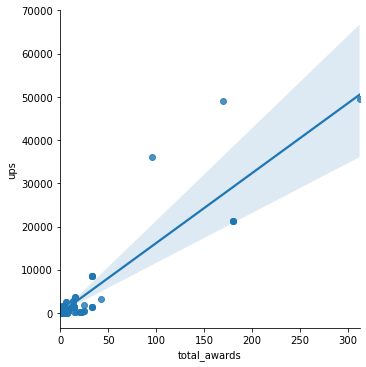

In [31]:
sns.lmplot(data = random_wsb, x = "total_awards", y = "ups")


Submission(id='n5y31a')

In [29]:
random_wsb

,title,self,text,comments,author,name,upvote_ratio,ups,downs,awarders,awards,total_awards,url
0,Okay boys i’m gonna say the n word,True,mods are asleep quickly send nude photography,[],spitfiur,t3_n5uysf,0.67,12,5.910448,[],"[{'giver_coin_reward': None, 'subreddit_id': N...",1,https://www.reddit.com/r/wallstreetbets/commen...
1,CTRM about to blow!!! 🚀🚀🚀🚀🚀🚀🚀,True,,[],speedybud13,t3_n5xzsw,0.35,0,0.000000,[],[],0,https://www.reddit.com/r/wallstreetbets/commen...
2,So about the compromised news,True,So what's up with all the news about this plac...,[],LrdRyu,t3_n60d8o,0.64,3,1.687500,[],[],0,https://www.reddit.com/r/wallstreetbets/commen...
3,$PSLV TO THE MOON! 🚀,False,,[],rbovenkamp,t3_n6015z,0.65,7,3.769231,[],[],0,https://i.redd.it/21tmw16jrfx61.jpg
4,Buy $GOEV join us in bankruptcy or Valhalla. G...,True,This is not financial advice. It is possible t...,[],BigProfessional1168,t3_n5ztnt,0.33,0,0.000000,[],[],0,https://www.reddit.com/r/wallstreetbets/commen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Well, I’m officially a retard and hate myself....",False,,[],Slapmyask45,t3_n5tclv,0.82,49,10.756098,[],[],0,https://i.redd.it/lgpiuzz5wdx61.jpg
996,Yes this is true,True,SOS earnings outrun MARA and RIOT by a long ru...,[],Zirkiy,t3_n605fn,0.63,9,5.285714,[],[],0,https://www.reddit.com/r/wallstreetbets/commen...
997,$IPOE - Short-squeeze candidate analysis,True,"Listen up ladies and gentleapes, I have some n...",[],airplane3579,t3_n60hrn,0.27,0,0.000000,[],[],0,https://www.reddit.com/r/wallstreetbets/commen...
998,Compilation of due diligence from SOS limited,True,\n\nLots of due diligence that proves SOS exis...,[],ItsYaBoyRobinHood,t3_n5xlog,0.56,6,4.714286,[],"[{'giver_coin_reward': None, 'subreddit_id': N...",1,https://www.reddit.com/r/wallstreetbets/commen...
